In [1]:
#machine learning models are categorised as supervised unsupervised and reinforcement

In [ ]:
#1.start with k centroids by putting them at random place
#2.compute distance of every point from centroid and cluster them accordingly
#3.adjust centroids so that they become center of gravity for given cluster
#4.again re-cluster every point based on their distance with centroid
#5.again adjust centroid
#6.recompute clusters and repeat this till data points stop changing clusters

In [3]:
#sum of square error(sse1)=sumof(xi-c1)^2
#for k=2 sse=sse1+sse2
#plot sse vs k the elbow point gives the required value of k 

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
from sklearn.cluster import KMeans

In [8]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)#it calculate sse for every i and appends it to sse array

In [9]:
from matplotlib import pyplot as plt

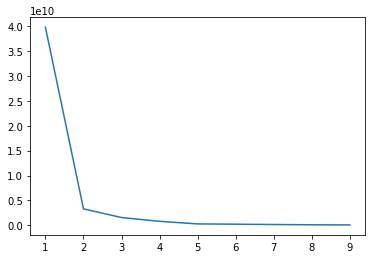

In [12]:
plt.plot(range(1,10),sse)
#now here it is a problem ie y and x axes are not equally spaces

In [28]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df['Age']=sc.fit_transform(df[['Age']])
df["Income($)"]=sc.fit_transform(df[["Income($)"]])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


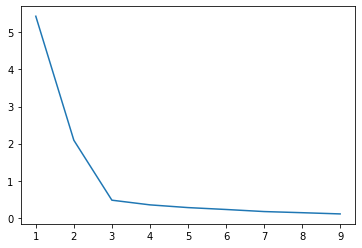

In [29]:
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)
plt.plot(range(1,10),sse)

In [30]:
#so now we can say that there are 3 clusters

In [41]:
km=KMeans(n_clusters=3)
df["clusters"]=km.fit_predict(df[["Age","Income($)"]])
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [43]:
c=km.cluster_centers_

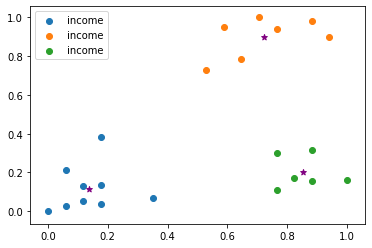

In [50]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]

plt.scatter(df0[["Age"]],df0[["Income($)"]],label="income")
plt.scatter(df1[["Age"]],df1[["Income($)"]],label="income")
plt.scatter(df2[["Age"]],df2[["Income($)"]],label="income")
plt.scatter(c[:,0],c[:,1],color="purple",marker="*")
plt.legend()